# TP images: convolutions
## Données numériques - 2022-23
### Diane Lingrand (Diane.Lingrand@univ-cotedazur.fr)

In [60]:
from skimage import io
from skimage import data
from skimage import transform
import numpy as np
from matplotlib import pyplot as plt
import math

In [61]:
%matplotlib inline

## Image issue de la bibliothèque scikit-image

*section similaire au TP précédent*

In [62]:
img = data.chelsea()
#img = io.imread('/home/lingrand/Ens/SSII/Cours8-contours/carreNoir.png')

In [63]:
print(img.shape)

(300, 451, 3)


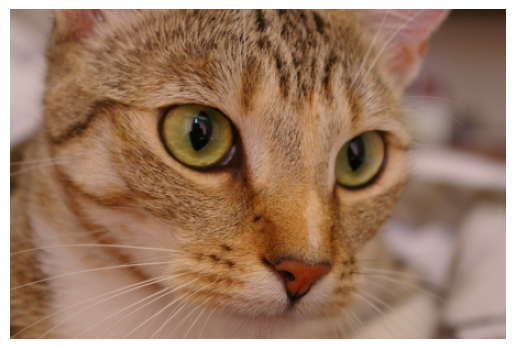

In [64]:
plt.axis('off')
plt.imshow(img)

## Implémentation de la convolution

In [65]:
# img est supposée à 1 canal et k de dimensions carrées impaires
# on va ignorer les problèmes aux bords
def maConvolution(img, k):
    (h,w) = img.shape[:2]
    dimK = k.shape[0]
    d = dimK//2
    res = img.copy()
    for i in range(d, h-d):
        for j in range(d, w-d):
            somme = 0.0
            for u in range(dimK):
                for v in range(dimK):
                    somme += k[u-d][v-d] * img[i-d+u][j-d+v]
            res[i][j] = np.abs(somme)
    return res

Pour tester cet opérateur, vous pouvez utiliser un filtre moyenneur (3x3) sur une image en niveau de gris

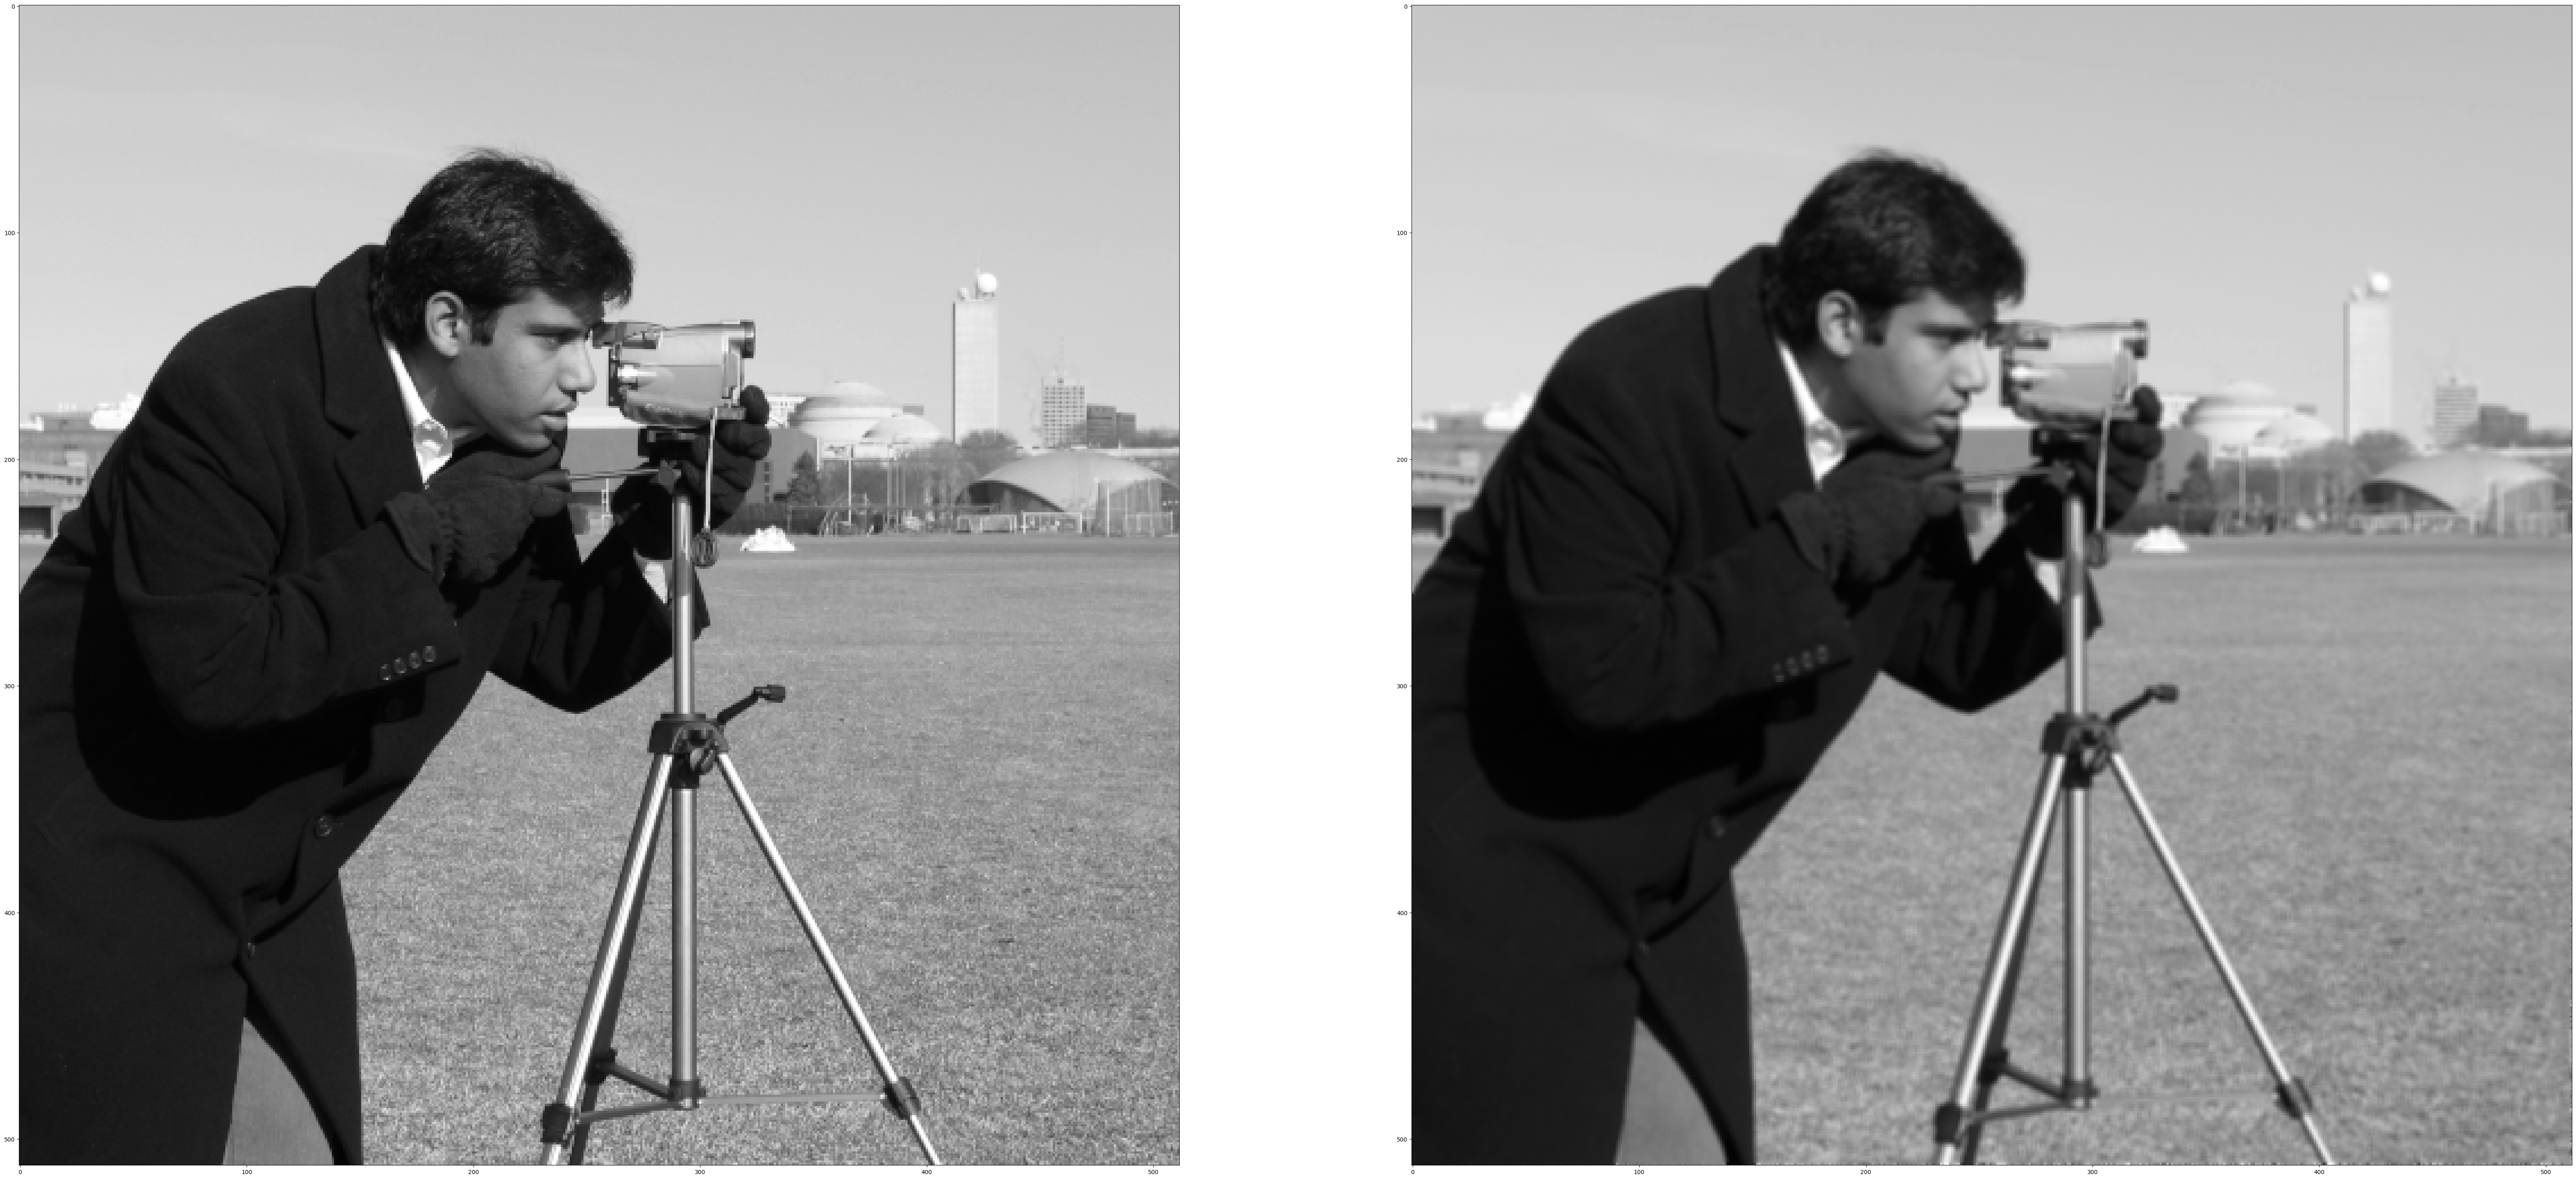

In [66]:
grayImage = data.camera()
kernel = np.ones((3,3))/9
newGrayImage = maConvolution(grayImage,kernel)

fig =plt.figure(figsize=(80,40))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(grayImage, cmap=plt.cm.gray)
ax = fig.add_subplot(1, 2, 2)
plt.imshow(newGrayImage, cmap=plt.cm.gray)
plt.show()

Faites en sorte que le code précédent fonctionne également avec des images couleurs. Observez bien les résultats.

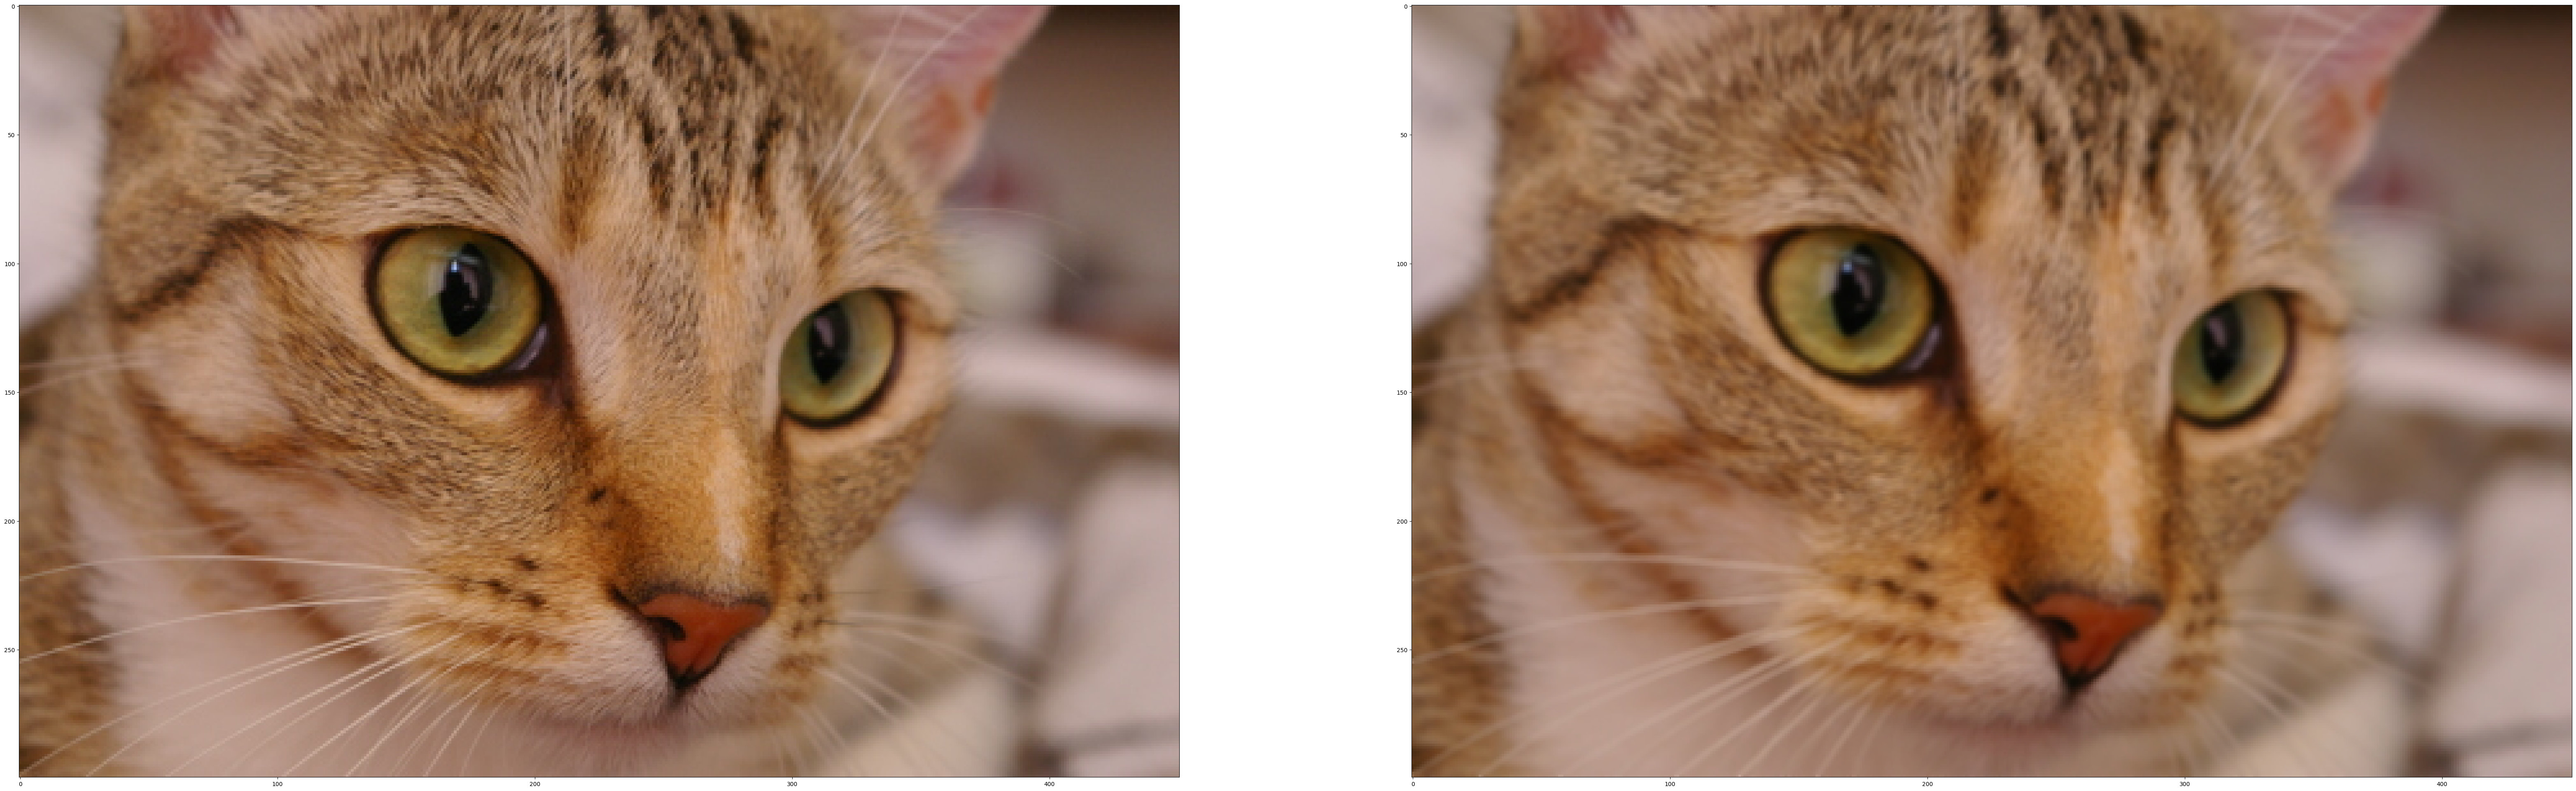

In [67]:
kernel = np.ones((3,3))/9

#Here we can extract all the color -> do the convolution on each one of them -> restack them using np.dstack
#But our algorithm is meant to work with RGB images directly

newImg = maConvolution(img,kernel)

fig =plt.figure(figsize=(80,40))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(img)
ax = fig.add_subplot(1, 2, 2)
plt.imshow(newImg)
plt.show()

## Lissage par convolution

Testez le lissage Gaussien par la convolution avec le noyau $\frac{1}{16}\begin{pmatrix} 1 & 2 & 1\\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{pmatrix}$.


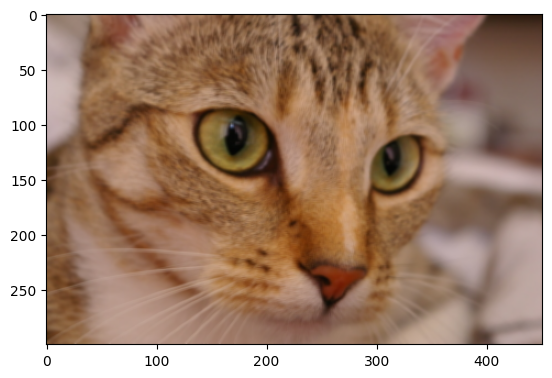

In [68]:
#Here initially the division by 16 was not present, it was just to show that it's important here
#You can try it by removing the /16, it'll break the img
lissGauss3x3 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16

newImg = maConvolution(img, lissGauss3x3)
plt.imshow(newImg)

## Contours par dérivée première

Un détecteur célèbre est celui de Sobel. Regardez les contours en x et en y avant de recomposer l'image résultat.

Si vous avez le moindre doute, essayez le détecteur sur une image simple, par exemple un carré noir sur fond blanc.

(338, 375, 4)


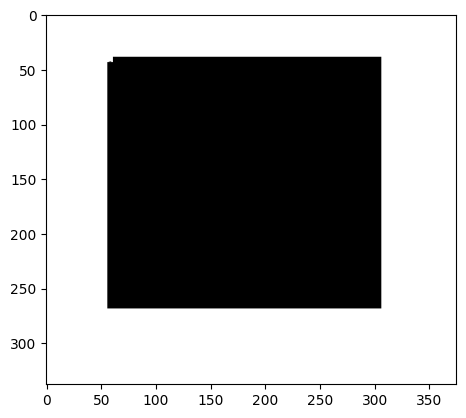

In [77]:
img = io.imread('./carreNoir.png')
plt.imshow(img)
print(img.shape)

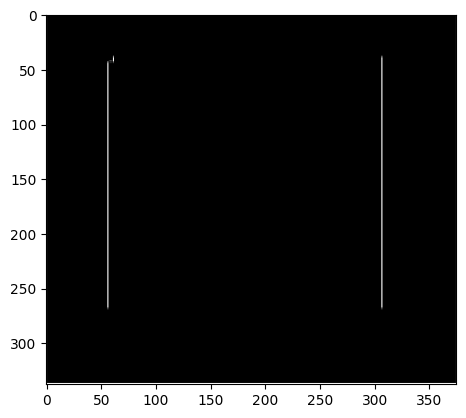

In [78]:
# calcul des contours verticaux
sobelx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])/4.0
imgSobelX = maConvolution(img[:,:,0:3],sobelx)
plt.imshow(np.abs(imgSobelX))

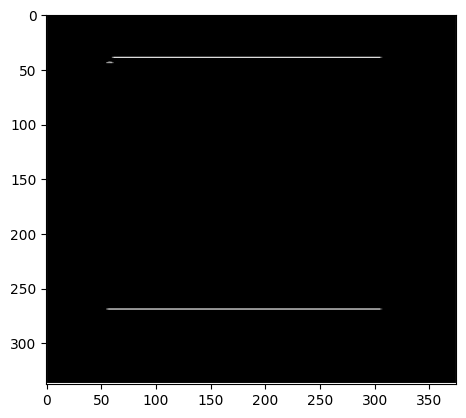

In [79]:
# calcul des contours verticaux
sobely = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])/4.0
imgSobelY = maConvolution(img[:,:,0:3],sobely)
plt.imshow(imgSobelY)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


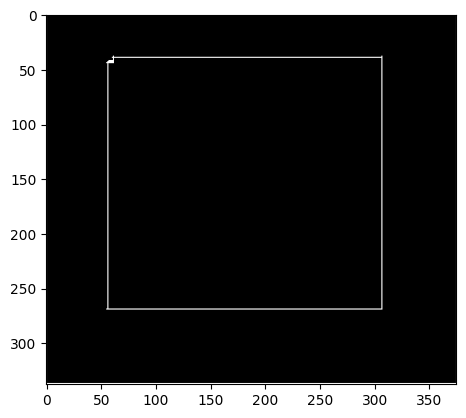

In [89]:
imgSobel = np.sqrt(imgSobelX**2 + imgSobelY**2)

#On multiplie par 1000 pour mieux voir car sinon les contours sont quasi invisible
plt.imshow(imgSobel.astype(np.uint8)*1000)

Regardez les contours de Sobel de plusieurs images de votre choix.

In [ ]:
img 

Testez d'autres filtres de contours par dérivée première comme par exemple celui de <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.prewitt">Prewitt</a>.

In [ ]:
# pour vous

## Contours par dérivée seconde

Testez également le détecteur de <a href="https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=sobel#skimage.filters.laplace">Laplace</a>.

In [ ]:
# pour vous

## Contour par différence de gaussienne

Lissez de deux façons différentes une image et regardez la différence (en valeur absolue).

In [ ]:
# pour vous

## Points d'intérêt (partie facultative, uniquement si tout est fait avant et compris)

### Harris

Commençons par Harris:

In [ ]:
from skimage.feature import corner_harris, corner_peaks

In [ ]:
pts=corner_peaks(corner_harris(img[:,:,1]), min_distance=1)
print( pts.shape[0], ' points found')
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')
plt.scatter(y=pts[:,0],x=pts[:,1],c='r',s=10)
plt.show()

Comment ajouter des points d'intérêt ? Examinez les paramètres par défaut.

### SIFT

Testons SIFT: pour cela, nous pouvons utiliser l'implémentation de OpenCV. Il faudra cependant installer la librairie.

In [ ]:
# si nécessaire, installation :
#            !pip install opencv-contrib-python

import cv2
print(cv2.__version__)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp,des = sift.detectAndCompute(gray,None)
cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

Que contiennent les variables kp et des ? Quelles sont les dimensions ?

In [ ]:
print(len(kp))
print(type(kp[0]))
print(len(des))
print(type(des[0]))
print(des.shape)